In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Giono-Jean']
list_titles_to_find=['Le-Hussard-sur-le-toit']
argsfig='./figs/indiv_chaps/names/giono_le-hussard-sur-le-toit'

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
list_chaps=list()

In [7]:
with open("/home/odysseus/Bureau/chapitres/code/topic_modelling_mallet/results/doc-topics-glob-chaps.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[2] in list_titles_to_find:
        #if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_'+str(max(list_chaps))+'.' in docname):
            #docname=replace_all(docname, list_authors_to_replace)
            docname=docname.split('_')[3].replace('.txt','')
            mallet_docnames.append(int(docname))
            for topic, share in grouper(2, values):
                triple = (int(docname), int(topic), float(share))
                doctopic_triples.append(triple)

In [8]:
print(doctopic_triples)

[(2, 16, 0.2550761421319797), (2, 13, 0.20431472081218274), (2, 17, 0.16624365482233502), (2, 10, 0.05710659898477157), (2, 11, 0.05456852791878172), (2, 2, 0.03680203045685279), (2, 0, 0.02918781725888325), (2, 12, 0.0266497461928934), (2, 4, 0.0266497461928934), (2, 6, 0.021573604060913704), (2, 18, 0.01903553299492386), (2, 14, 0.01903553299492386), (2, 1, 0.013959390862944163), (2, 19, 0.011421319796954314), (2, 9, 0.011421319796954314), (2, 8, 0.011421319796954314), (2, 5, 0.011421319796954314), (2, 3, 0.011421319796954314), (2, 15, 0.006345177664974619), (2, 7, 0.006345177664974619), (9, 16, 0.1424778761061947), (9, 10, 0.10353982300884956), (9, 9, 0.09292035398230089), (9, 13, 0.08584070796460178), (9, 4, 0.07345132743362832), (9, 17, 0.06991150442477877), (9, 3, 0.06814159292035399), (9, 19, 0.048672566371681415), (9, 18, 0.048672566371681415), (9, 0, 0.046902654867256637), (9, 1, 0.04336283185840708), (9, 11, 0.03982300884955752), (9, 8, 0.036283185840707964), (9, 5, 0.0238938

In [9]:
mallet_docnames = sorted(mallet_docnames)

In [10]:
num_docs = len(mallet_docnames)

In [11]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [12]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

280
20


In [13]:
doctopic = np.zeros((num_docs, num_topics))

In [14]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [15]:
novel_names = []

In [16]:
for fn in mallet_docnames:
    basename = os.path.basename(str(fn))
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

14


In [17]:
novel_names = np.asarray(novel_names)

In [18]:
doctopic

array([[0.02295918, 0.03826531, 0.04919825, 0.0462828 , 0.04992711,
        0.03462099, 0.01639942, 0.03607872, 0.00619534, 0.04336735,
        0.19642857, 0.04992711, 0.01421283, 0.02077259, 0.18258017,
        0.02587464, 0.1111516 , 0.01931487, 0.00911079, 0.02733236],
       [0.02918782, 0.01395939, 0.03680203, 0.01142132, 0.02664975,
        0.01142132, 0.0215736 , 0.00634518, 0.01142132, 0.01142132,
        0.0571066 , 0.05456853, 0.02664975, 0.20431472, 0.01903553,
        0.00634518, 0.25507614, 0.16624365, 0.01903553, 0.01142132],
       [0.01168224, 0.03504673, 0.02102804, 0.01635514, 0.0771028 ,
        0.03504673, 0.01168224, 0.01635514, 0.03037383, 0.01168224,
        0.04439252, 0.02102804, 0.05841121, 0.02570093, 0.01168224,
        0.04439252, 0.25934579, 0.21261682, 0.01635514, 0.03971963],
       [0.0537037 , 0.02037037, 0.01666667, 0.02777778, 0.02407407,
        0.00925926, 0.02037037, 0.03518519, 0.10555556, 0.01666667,
        0.17592593, 0.06111111, 0.07222222, 0

In [19]:
doctopic_orig = doctopic.copy()

In [20]:
num_groups = len(set(novel_names))
print(num_groups)

14


In [21]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [22]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [23]:
doctopic = doctopic_grouped

In [24]:
doctopic

array([[0.02295918, 0.03826531, 0.04919825, 0.0462828 , 0.04992711,
        0.03462099, 0.01639942, 0.03607872, 0.00619534, 0.04336735,
        0.19642857, 0.04992711, 0.01421283, 0.02077259, 0.18258017,
        0.02587464, 0.1111516 , 0.01931487, 0.00911079, 0.02733236],
       [0.01699029, 0.04126214, 0.02669903, 0.01699029, 0.21116505,
        0.01213592, 0.01699029, 0.07524272, 0.02669903, 0.02184466,
        0.08495146, 0.05097087, 0.0461165 , 0.01699029, 0.01699029,
        0.02184466, 0.13834951, 0.10436893, 0.0315534 , 0.02184466],
       [0.0273523 , 0.07330416, 0.02954048, 0.03391685, 0.1214442 ,
        0.02516411, 0.01641138, 0.03391685, 0.00547046, 0.07111597,
        0.13894967, 0.01859956, 0.03829322, 0.03172867, 0.07330416,
        0.02516411, 0.13676149, 0.05579869, 0.01641138, 0.0273523 ],
       [0.04591837, 0.01870748, 0.05272109, 0.03571429, 0.14115646,
        0.01530612, 0.07993197, 0.03231293, 0.07993197, 0.03571429,
        0.04931973, 0.04251701, 0.03231293, 0

In [25]:
N, K = doctopic.shape
print(K)

20


In [26]:
ind = np.arange(N)

In [27]:
width = 0.5

In [28]:
plt.rcParams["figure.figsize"] = [16,9]

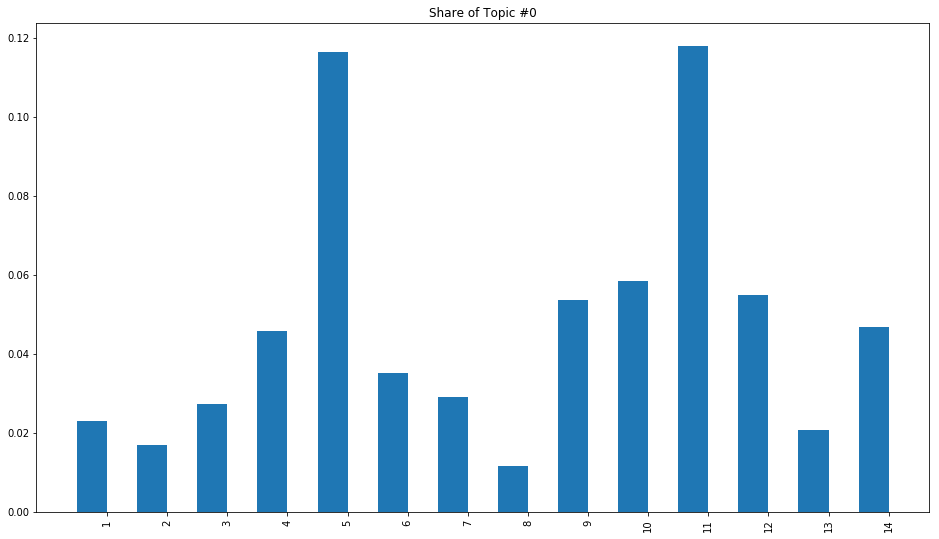

In [29]:
plt.bar(ind, doctopic[:,0], width=width)
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)
plt.title('Share of Topic #0')
plt.show()

In [30]:
plots = []

In [31]:
height_cumulative = np.zeros(N)

In [32]:
list_topics =['espace domestique', 'vie conjugale', 'affaires/argent/mondanités', '?', 'noblesse', 'justice/crime', 'réflexions sur l\'existence', 'police/intrigue/bureaucratie', 'corps public/théâtre/festivités', 'temps','armée','?','nature/éléments/cosmos','voyage','sentiment','corps (morbide ?)','marine','famille','nature/végétal','religion']

In [33]:
list_topics_glob =['monde domestique', 'temps', 'famille', 'marine', 'corps (entier)', 'réflexions sur l\'existence', '?', 'famille (proche) ?', 'crime/affaire','armée', 'religion','sentiment','corps (visage)','mondanités','noblesse/titres','argot','nature','noblesse/lieux de noblesse','vie/mort','?']

In [34]:
list_topics_glob_chaps =['savoir (universitaire ?)', '?', 'judiciaire', '? (monde de la ville et de la nuit)', 'armée', 'marine', 'sentiments', 'noblesse (de salon)', 'arts','religion', 'nature','police','argent/affaires','corps','nature/éléments','monde domestique','troquets ?','chasse/homme et animal','famille','noblesse masculine/haute noblesse']

In [35]:
list_topics_glob_adj =['drame/crime', 'nature', 'religion', '?', 'haute noblesse/noblesse masculine', '?', 'famille', 'marine', 'mondanités/salons','corps intime/visage', 'affaires/argent','armée','espace domestique/espace du boudoir ?','réflexions existencielles/savoir','sentiments','noblesse (versant galanterie)','temps','couleur','?','technologie ?']

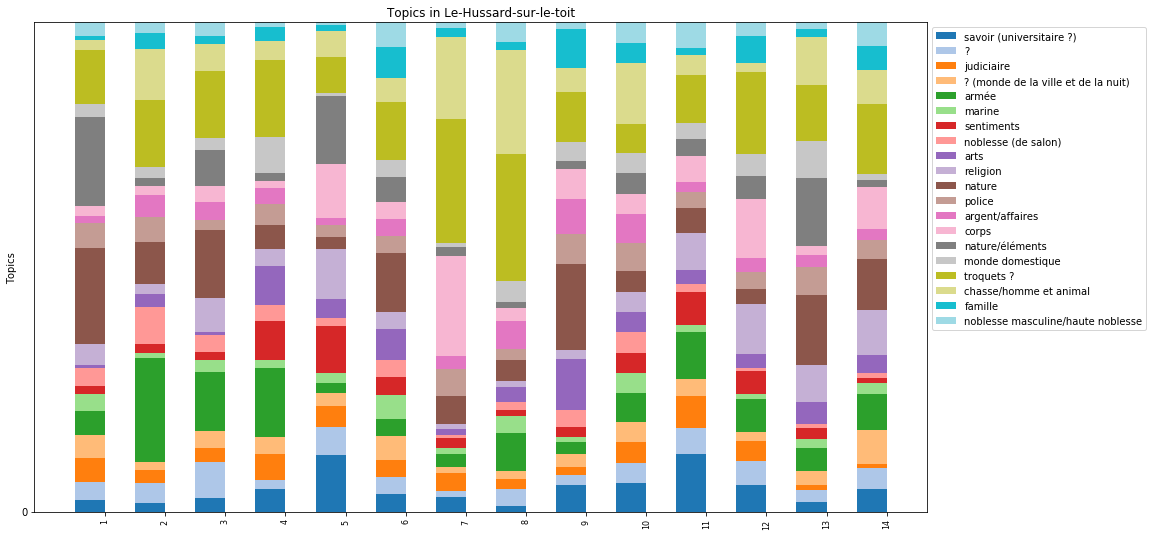

In [36]:
fig=plt.figure()
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

plt.ylim((0, 1))
plt.ylabel('Topics')
plt.title('Topics in '+', '.join(list_titles_to_find))
#ici mettre fontsize à 2 pour les romans à beaucoup de chapitres, et 6 ou 8 pour les autres
plt.xticks(rotation=90,fontsize =8)
plt.xticks(ind+width/2, novel_names)
plt.yticks(np.arange(0, 1, 10))
topic_labels = [k for k in list_topics_glob_chaps]
plt.legend([p[0] for p in plots], topic_labels,bbox_to_anchor=(1,1), loc="upper left")
fig.savefig(argsfig+'.png',bbox_inches='tight',dpi=300)
plt.close(fig)
display(fig)